# Dog Breed Classification

### About The Dataset
This dataset contains faces of famous people and various dogbreeds. The faces are contained in lfw folder and dog faces in dogImages folder. Primary purpose of this dataset is dog breed classification.

[Link to Dataset](https://www.kaggle.com/venktesh/person-images)

## 1. Imports

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt

## 2. Train-Test Split

In [2]:
img_height,img_width=224,224
batch_size=8

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './dogImages/train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './dogImages/valid',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6680 files belonging to 133 classes.
Found 835 files belonging to 133 classes.


## 3. Visualising Data

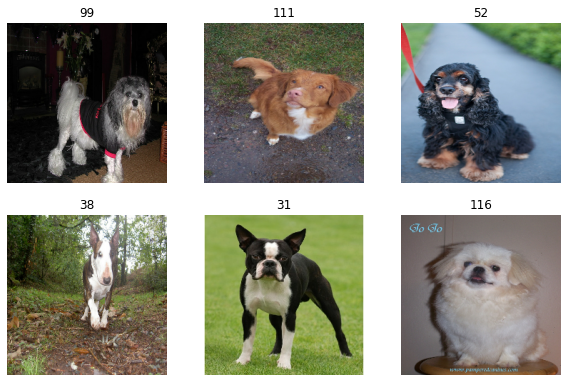

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

## 4. Building Model

In [4]:
model_p = tf.keras.applications.Xception(classifier_activation='relu', input_shape=(224, 224, 3), include_top=False)
model_p.trainable = False
model = tf.keras.Sequential([model_p])
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(133, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 133)               272517    
                                                                 
Total params: 21,133,997
Trainable params: 272,517
Non-trainable params: 20,861,480
_________________________________________________________________


## 5. Training Model

In [5]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception.h5',verbose=1,monitor='val_accuracy',save_best_only=True,mode ='max')
early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False,
)
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=25, callbacks=[checkpoint, early])

Epoch 1/25
105/105 [==============================] - ETA: 0s - loss: 20.4421 - accuracy: 0.0120
Epoch 00001: val_accuracy improved from -inf to 0.05150, saving model to xception.h5


C:\Users\stdnt\Desktop\Code\Tensorflow\venv\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


105/105 [==============================] - 17s 122ms/step - loss: 20.4421 - accuracy: 0.0120 - val_loss: 10.9990 - val_accuracy: 0.0515
Epoch 2/25
104/105 [============================>.] - ETA: 0s - loss: 11.8764 - accuracy: 0.0541
Epoch 00002: val_accuracy improved from 0.05150 to 0.13892, saving model to xception.h5
105/105 [==============================] - 12s 110ms/step - loss: 11.8832 - accuracy: 0.0551 - val_loss: 8.4060 - val_accuracy: 0.1389
Epoch 3/25
104/105 [============================>.] - ETA: 0s - loss: 9.2254 - accuracy: 0.1202
Epoch 00003: val_accuracy improved from 0.13892 to 0.28862, saving model to xception.h5
105/105 [==============================] - 12s 110ms/step - loss: 9.2395 - accuracy: 0.1198 - val_loss: 6.0160 - val_accuracy: 0.2886
Epoch 4/25
104/105 [============================>.] - ETA: 0s - loss: 6.3643 - accuracy: 0.2560
Epoch 00004: val_accuracy improved from 0.28862 to 0.39162, saving model to xception.h5
105/105 [==============================] -

## 6. Visualizing Training Data

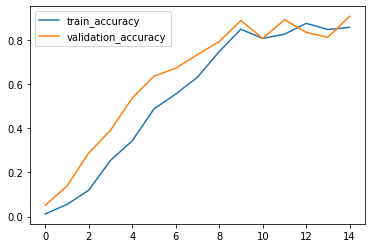

In [6]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

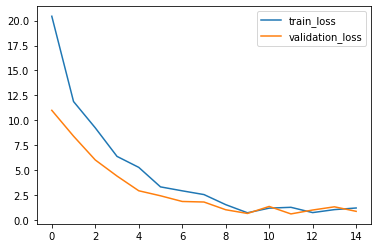

In [7]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

The resultant accuracy of the model is 90.9%